<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [10]:
file_path = "../data/Wholesale customers data.csv"
data = pd.read_csv(file_path)
df = data.copy()

In [11]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [12]:
df.columns = df.columns.map(lambda x: x.lower())
df.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.



# What does each column mean?

- **Channel** : 1 means Horeca (Hotel,Restaurant, Cafe/Catering) and 2 means Retail (Nominal)
- **Region** : 1 means Lisbon, 2 Oporto and 3 is Other Region (Nominal)
- **Fresh** : annual spending on fresh products (Continous)
- **Milk**: annual spending on milk products (Continous)
- **Frozen**: annual spending on Grocery (Continous)
- **Detergants_Paper**: annual spending on detergants and paper products (Continous)
- **Delicassen**: annual spending on delicatessen (Continous)

In [14]:
df.nunique()

channel               2
region                3
fresh               433
milk                421
grocery             430
frozen              426
detergents_paper    417
delicassen          403
dtype: int64

In [15]:
df.channel.value_counts()

channel
1    298
2    142
Name: count, dtype: int64

In [16]:
df.region.value_counts()

region
3    316
1     77
2     47
Name: count, dtype: int64

Any categorical data to convert?
- Channel does not need to be converted as it is binary.
- Region should be one hot fix encoded as otherwise system will perceive a nominal order and rank the regions.

In [17]:
region_dummies = pd.get_dummies(df.region, prefix='region', dtype=int)
region_dummies.head()

,region_1,region_2,region_3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [20]:
df = pd.concat([df, region_dummies], axis=1)
df.drop(['region'], axis=1, inplace=True)
df.head()

,channel,fresh,milk,grocery,frozen,detergents_paper,delicassen,region_1,region_2,region_3,region_1,region_2,region_3,region_1,region_2,region_3
0,2,12669,9656,7561,214,2674,1338,0,0,1,0,0,1,0,0,1
1,2,7057,9810,9568,1762,3293,1776,0,0,1,0,0,1,0,0,1
2,2,6353,8808,7684,2405,3516,7844,0,0,1,0,0,1,0,0,1
3,1,13265,1196,4221,6404,507,1788,0,0,1,0,0,1,0,0,1
4,2,22615,5410,7198,3915,1777,5185,0,0,1,0,0,1,0,0,1


 Any missing data to remove?

In [22]:
df.isna().sum()

channel             0
fresh               0
milk                0
grocery             0
frozen              0
detergents_paper    0
delicassen          0
region_1            0
region_2            0
region_3            0
region_1            0
region_2            0
region_3            0
region_1            0
region_2            0
region_3            0
dtype: int64

In [23]:
df.eq(' ').sum()

channel             0
fresh               0
milk                0
grocery             0
frozen              0
detergents_paper    0
delicassen          0
region_1            0
region_2            0
region_3            0
region_1            0
region_2            0
region_3            0
region_1            0
region_2            0
region_3            0
dtype: int64

In [24]:
df.duplicated().sum()

0

* Column collinearity - any high correlations?

In [26]:
df.nunique().sort_values(ascending=False)

fresh               433
grocery             430
frozen              426
milk                421
detergents_paper    417
delicassen          403
channel               2
region_1              2
region_2              2
region_3              2
region_1              2
region_2              2
region_3              2
region_1              2
region_2              2
region_3              2
dtype: int64

In [28]:
num = df.select_dtypes(include='number')
cat = num.loc[:, num.nunique() < 3]
num = num.drop(columns=cat.columns)

In [32]:
num["total_sales"] = num.sum(axis=1)
num.head()

,fresh,milk,grocery,frozen,detergents_paper,delicassen,total_sales
0,12669,9656,7561,214,2674,1338,68224
1,7057,9810,9568,1762,3293,1776,66532
2,6353,8808,7684,2405,3516,7844,73220
3,13265,1196,4221,6404,507,1788,54762
4,22615,5410,7198,3915,1777,5185,92200


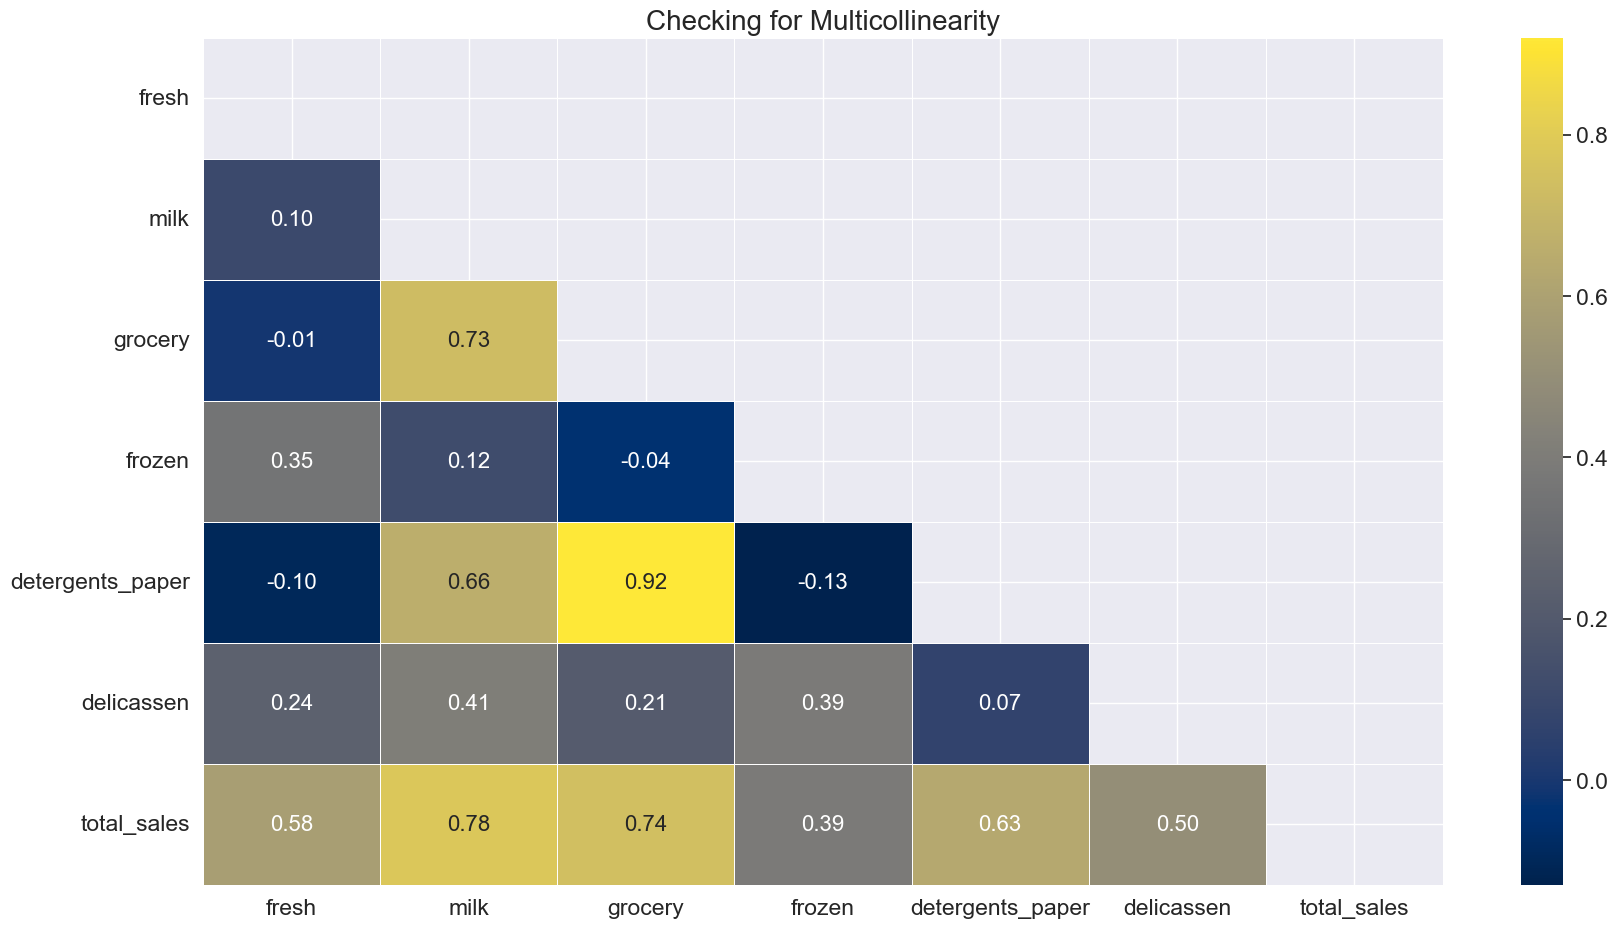

In [33]:
num_corr = num.corr().round(2)
# Hide the duplicate part
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(20, 11))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 16}, linewidths=.5, cmap="cividis", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Checking for Multicollinearity", fontsize=20) 
plt.show()

<Axes: xlabel='grocery', ylabel='detergents_paper'>

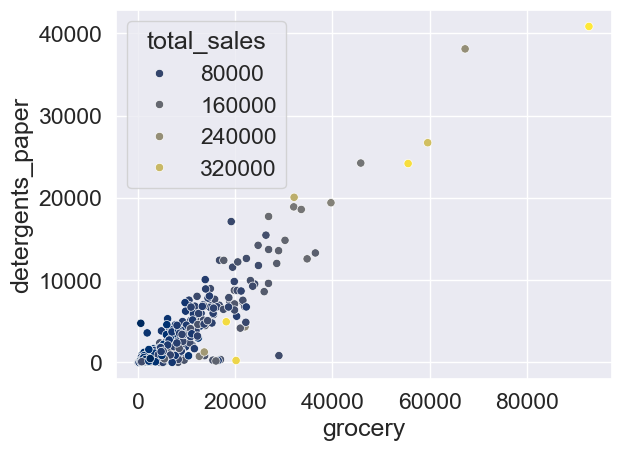

In [36]:
sns.scatterplot(x="grocery", y="detergents_paper", hue="total_sales", data=num, palette="cividis")


I chose my target to be the sum of all annual sales. I called the column 'total_sales'. I see multicollinearity between detergents_paper and groceries. I would drop detergents_paper as the correlation with the target is lower than for groceries.

In [34]:
df = pd.concat([cat, num], axis=1)
df.drop(['detergents_paper'], axis=1, inplace=True)
df.head()

,channel,region_1,region_2,region_3,region_1,region_2,region_3,region_1,region_2,region_3,fresh,milk,grocery,frozen,delicassen,total_sales
0,2,0,0,1,0,0,1,0,0,1,12669,9656,7561,214,1338,68224
1,2,0,0,1,0,0,1,0,0,1,7057,9810,9568,1762,1776,66532
2,2,0,0,1,0,0,1,0,0,1,6353,8808,7684,2405,7844,73220
3,1,0,0,1,0,0,1,0,0,1,13265,1196,4221,6404,1788,54762
4,2,0,0,1,0,0,1,0,0,1,22615,5410,7198,3915,5185,92200


Although, now that I dropped "detergents_paper" the we just need to remember that the total sales column includes the annual sales for detergents paper, which are not visible in the dataframe anymore.

Descriptive statistics - any outliers to remove?

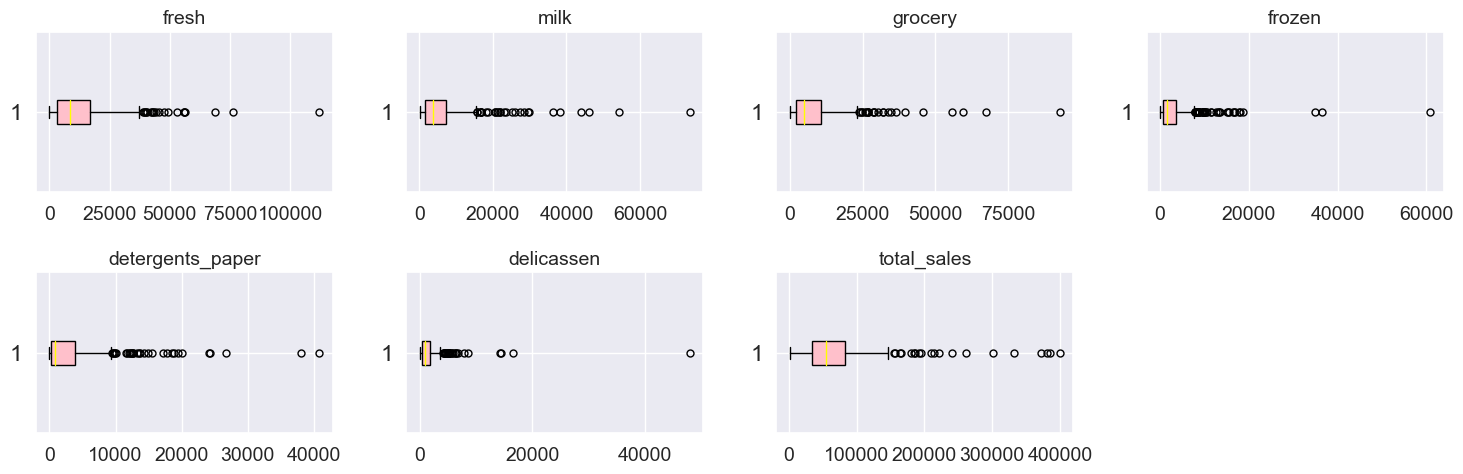

In [39]:
color = 'pink'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=14)
    ax.tick_params(axis='x', labelsize=14)

plt.tight_layout()
plt.show()

As we have exponential distributions there are no outliers to remove. Removing the highest outliers would produce then new outliers.

Any distribution skew?

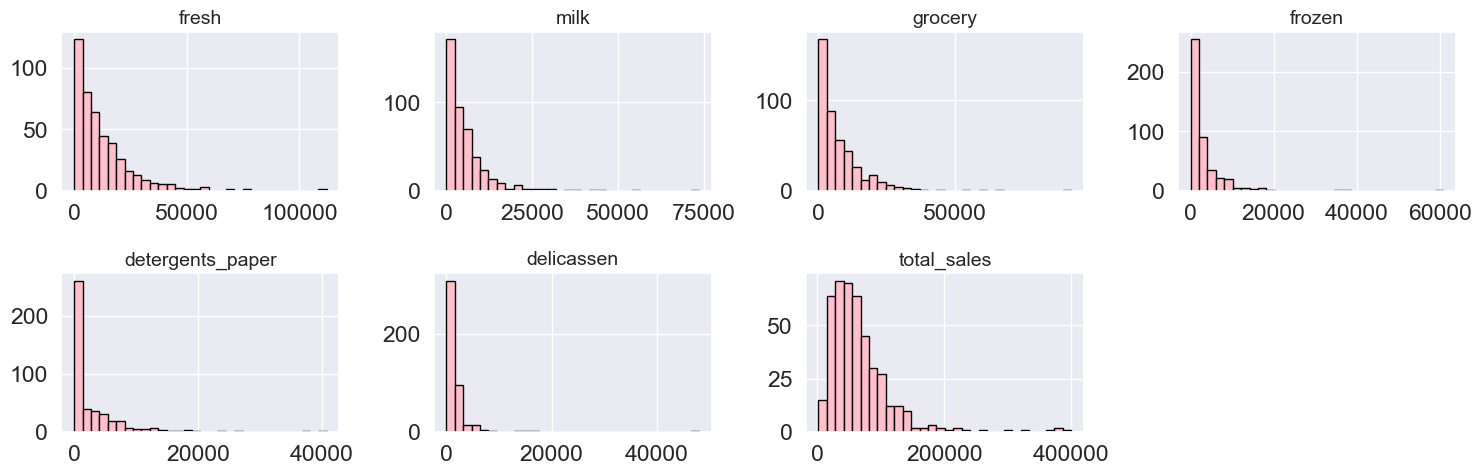

In [40]:
color = 'pink'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i], fontsize=14)

plt.tight_layout()
plt.show()

The data is right skewed. The data has a positive skew.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [43]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
detergents_paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0
total_sales,440.0,66452.272727,52712.603460,1808.0,34897.50,54984.0,82615.00,399782.0


**Your observations here**

- For milk, fresh, grocery, frozen, detergents_paper and delicassen the distribution is expontential.
- The total sales column looks a bit more normal but with heavy right or positive skew.



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Your code here

**Your comment here**

-  I left the channel to be binary as it is not nominal for the model
-  I did a one hot fix dummy columns for region as with three regions the model would perceive an inherent hierarchy and order which is not present
- I did not decide to remove outliers as the distributions as exponential right and positively skewed.
- There were no duplicate or empty or NAN columns to remove
- I did lower case all of the column names
- I created a new column 'total_sales' and moved it to the end to check multicollinearity
- I removed detergents_paper column due to high multicollinearity with groceries and since it had lower correlation with the target column 'total_sales'

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [15]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [19]:
from sklearn.cluster import KMeans

# Your code here:

### Looking to the elbow we can choose 2 like the correct number of clusters

In [21]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

In [ ]:
clean_customers['Label'] = clusters

Count the values in `labels`.

In [ ]:
# Your code here:

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [ ]:
from sklearn.cluster import DBSCAN 

# Your code here


Count the values in `labels_DBSCAN`.

In [26]:
# Your code here


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [30]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

In [ ]:
# Your code here:

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [ ]:
# Your code here:

Which algorithm appears to perform better?

**Your observations here**

- 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [41]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

- 